# Explore here

It's recommended to use this notebook for exploration purposes.

In [92]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [79]:
resource_url = "https://companies-market-cap-copy.vercel.app/index.html"

html_content = requests.get(resource_url, time.sleep(10))

if html_content:
    soup = BeautifulSoup(html_content.text, 'html.parser')

soup


<!DOCTYPE html>

<html lang="en-US">
<head>
<title>Tesla (TSLA) - Revenue</title>
<meta charset="utf-8"/>
<link href="https://companiesmarketcap.com/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/img/icons/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/img/icons/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/img/icons/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/img/icons/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
<link href="/img/icons/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="/img/icons/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="/img/icons/apple-icon-144x144.png" rel="apple-touch-icon" sizes="144x144"/>
<link href="/img/icons/apple-icon-152x152.png" rel="apple-touch-icon" sizes="152x152"/>
<link href="/img/icons/apple-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
<link href="/img/ic

In [80]:
import re

trs = soup.find_all("tr")
 
results = []  
for row in trs: 
    span_year = row.find("span", class_="year")
    revenue_td = row.find_all("td")

    if span_year and len(revenue_td)>1:
        year = span_year.text.strip()   
        revenue = revenue_td[1].text.replace('$', '').replace(' B', '').strip()  
        results.append((year, revenue))  

# Print the results  
for year, revenue in results:  
    print(f"Year: {year}, Revenue: {revenue}")  

# Print the results list  
print("Results List:", results)  
      





Year: 2024, Revenue: 97.15
Year: 2023, Revenue: 96.77
Year: 2022, Revenue: 81.46
Year: 2021, Revenue: 53.82
Year: 2020, Revenue: 31.53
Year: 2019, Revenue: 24.57
Year: 2018, Revenue: 21.46
Year: 2017, Revenue: 11.75
Year: 2016, Revenue: 7.00
Year: 2015, Revenue: 4.04
Year: 2014, Revenue: 3.19
Year: 2013, Revenue: 2.01
Year: 2012, Revenue: 0.41
Year: 2011, Revenue: 0.20
Year: 2010, Revenue: 0.11
Year: 2009, Revenue: 0.11
Results List: [('2024', '97.15'), ('2023', '96.77'), ('2022', '81.46'), ('2021', '53.82'), ('2020', '31.53'), ('2019', '24.57'), ('2018', '21.46'), ('2017', '11.75'), ('2016', '7.00'), ('2015', '4.04'), ('2014', '3.19'), ('2013', '2.01'), ('2012', '0.41'), ('2011', '0.20'), ('2010', '0.11'), ('2009', '0.11')]


In [87]:
years = [year for year, revenue in results]
years_reversed = years[::-1]
revenues = [revenue for year, revenue in results]
revenues_reversed = revenues[::-1]

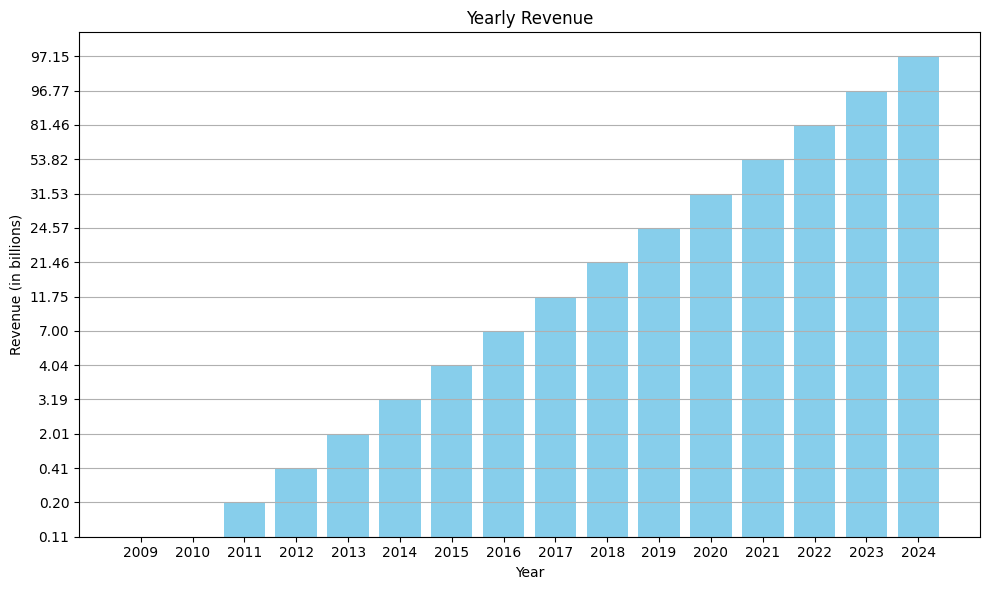

In [88]:
plt.figure(figsize=(10,6))
plt.bar(years_reversed, revenues_reversed, color="skyblue")
plt.xlabel('Year')  
plt.ylabel('Revenue (in billions)')  
plt.title('Yearly Revenue')
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()  


In [96]:
df = pd.DataFrame(results, columns=["Date", "Revenue"])
df.sort_values("Date")

,Date,Revenue
15,2009,0.11
14,2010,0.11
13,2011,0.20
12,2012,0.41
11,2013,2.01
10,2014,3.19
9,2015,4.04
8,2016,7.00
7,2017,11.75
6,2018,21.46


In [90]:
conn = sqlite3.connect("tesla_revenues.db")
cursor = conn.cursor()


In [91]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS revenue(
    date TEXT,
    revenue REAL
        )
        """       )

In [ ]:
for index,row in df.iterrows():
    cursor.execute("INSERT INTO revenue (date, revenue) VALUES (?, ?)", (row["Date"], row["Revenue"]))

conn.commit()
conn.close()